# Assessments

<div style='text-align: justify;'>
    Congratulations on finishing the MPL course!! Hopefully, you learned some valuable skills along the way and had fun doing it. Now it is time to put those skills to the test. In this assessment, we have two problems: First, you will train a new model capable of classifying the $10$ different classes all included in the database known as <a href="https://www.cs.toronto.edu/~kriz/cifar.html">CIFAR-10</a>. You will need to get the model to a validation to pass the assessment, although we challenge you to do even better if you can. You will have to use the skills you learned in the previous exercises.
</div>


## Problem #1: CIFAR-10 classification

<p style='text-align: justify;'>
To start studying neural networks, it is necessary to understand and be able to apply the most basic concepts of recognition to your model. A good way to test and train your model is to use the CIFAR-10 database which is a set of $60,000$ images for $10$ different classes (planes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks) which are identified from $0$ to $9$ respectively. With that in mind, you will train your model on top of this base, making it possible to correctly recognize each element of these classes.
</p>    

<p style="text-align: center;">
 <img src="../images/figure15_CIFAR10.png">
</p>

### Characteristics of images from the CIFAR-10 database
<p style='text-align: justify;'>
Each image has dimensions of $32$x$32$ pixels, so remember to adjust your image when making a prediction with the model. For each class, there are $6,000$ images related to its type, so you must best adjust the number of training epochs as well as the learning rate.</p>

Then:

1. Create an MLP neural network.

2. Import the CIFAR-10 database from the torchvision library.

3. Train your model so that it correctly performs predictions, paying attention to the input parameters.

4. Perform the prediction with some image.

# ☆ Solution problem #1 - CIFAR-10 classification ☆ 

#### ⊗ Define the MLP architecture

<p style='text-align: justify;'>These libraries are used to import and manipulate PyTorch tensors, define the MLP architecture, define the loss function, optimize the model, import the CIFAR-10 database, perform image transformations, and calculate evaluation metrics.</p>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision.transforms import transforms
import numpy as np
import os
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

input_size = 3072  # input size (32 x 32)
hidden_size = 128
output_size = 10
learning_rate = 0.01
num_epochs = 200

# Convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]) 

Files already downloaded and verified
Epoch 1/200, Loss: 1.7874
Epoch 2/200, Loss: 1.5803
Epoch 3/200, Loss: 1.4990
Epoch 4/200, Loss: 1.4385
Epoch 5/200, Loss: 1.3875
Epoch 6/200, Loss: 1.3451
Epoch 7/200, Loss: 1.3088
Epoch 8/200, Loss: 1.2762
Epoch 9/200, Loss: 1.2464
Epoch 10/200, Loss: 1.2200
Epoch 11/200, Loss: 1.1947
Epoch 12/200, Loss: 1.1714
Epoch 13/200, Loss: 1.1467
Epoch 14/200, Loss: 1.1262
Epoch 15/200, Loss: 1.1061
Epoch 16/200, Loss: 1.0858
Epoch 17/200, Loss: 1.0689
Epoch 18/200, Loss: 1.0500
Epoch 19/200, Loss: 1.0325
Epoch 20/200, Loss: 1.0162
Epoch 21/200, Loss: 1.0014
Epoch 22/200, Loss: 0.9828
Epoch 23/200, Loss: 0.9683
Epoch 24/200, Loss: 0.9530
Epoch 25/200, Loss: 0.9377
Epoch 26/200, Loss: 0.9222
Epoch 27/200, Loss: 0.9112
Epoch 28/200, Loss: 0.8966
Epoch 29/200, Loss: 0.8812
Epoch 30/200, Loss: 0.8672
Epoch 31/200, Loss: 0.8566
Epoch 32/200, Loss: 0.8416
Epoch 33/200, Loss: 0.8309
Epoch 34/200, Loss: 0.8178
Epoch 35/200, Loss: 0.8059
Epoch 36/200, Loss: 0.7957

#### ⊗  Training model

In [ ]:
# Load torchvision CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./datasets', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

model = MLP(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Loop
for epoch in range(num_epochs):
    total_loss = 0
    for images, labels in trainloader:
        # Resize images to a one-dimensional vector
        images = images.view(-1, input_size)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimzation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print the average loss each epoch
    average_loss = total_loss / len(trainloader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}")

#### ⊗  Calculating the accuracy of the model

In [ ]:
# For the calculation of accuracy, separate data from CIFAR-10, not used in training, will be used

# Load torchvision CIFAR-10 test dataset
testset = torchvision.datasets.CIFAR10(root='./datasets', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Set model to evaluation mode
model.eval()

# Initialize variables for metrics and confusion matrix
correct = 0
total = 0
confusion_matrix = np.zeros((output_size, output_size), dtype=np.int32)

# Disable gradient computation for faster inference
with torch.no_grad():
    for images, labels in testloader:
        # Resize images to a one-dimensional vector
        images = images.view(-1, input_size)

        # Forward pass and get predictions
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Update total number of samples
        total += labels.size(0)

        # Update number of correct predictions
        correct += (predicted == labels).sum().item()

        # Update confusion matrix
        for i in range(len(labels)):
            confusion_matrix[labels[i]][predicted[i]] += 1

# Calculate accuracy
accuracy = correct / total
print("Accuracy: {:.2%}".format(accuracy))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

#### ⊗  Images test

The `path_image` is a directory where the test images are located. The following have some images validations:

- validation-model-cifar10-cat.jpg
- validation-model-cifar10-dog.jpg
- validation-model-cifar10-bird.jpg

In [2]:
path_image = './images/validation-model-cifar10-dog.jpg'

#### ⊗  Image preprocessing

In [3]:
# Enter the path to your image here
image = Image.open(path_image) 

# Image pre-processing
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to expected input size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])
image = transform(image)

# Add an extra dimension in the image tensor and resize image
image = image.unsqueeze(0)
image = image.view(-1, input_size)

# Passing through the neural network
model.eval()  # Change model mode to evaluation
with torch.no_grad():
    output = model(image)

# Results
probabilities = torch.softmax(output, dim=1)
predicted_class = torch.argmax(probabilities, dim=1).item()

classes_Cifar10 = ["Airplane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]

print(f"Expected class: {classes_Cifar10[predicted_class]}")

Expected class: Dog


#### ⊗ Display of the image

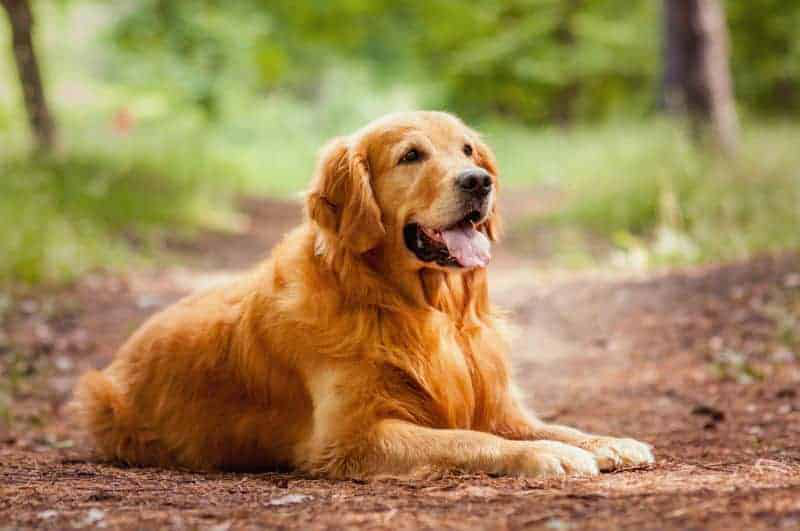

In [4]:
#This will import and display a .jpg image in Jupyter:
from IPython.display import display
from PIL import Image
display(Image.open(path_image))

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [ ]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

## Clear the temporary files

After finishing the assessment, please execute the following cell to clear up the directory.

In [5]:
!rm -rf ../models/handwritten-model.pt ../datasets/cifar-10-python.tar.gz  ../datasets/cifar-10-batches-py ../datasets/cifar-10-batches-py ../datasets/MNIST  cifar-10*  